In [5]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
from porousmedialab.batch import Batch
import numpy as np
import seaborn as sns
%matplotlib inline

In [6]:
tend = 470 * 24 * 60 * 60
dt = 60 * 60 * 12

In [7]:
bl = Batch(tend, dt)

In [8]:
# Bacteria:
bl.add_species(element='X_F', init_conc=5e-4)
bl.add_species(element='X_N', init_conc=1e-4)
bl.add_species(element='X_I', init_conc=2e-5)
bl.add_species(element='X_S', init_conc=2.5e-7)
bl.add_species(element='X_M', init_conc=5e-9)

# ED
bl.add_species(element='C6H6O', init_conc=10e-4)
bl.add_species(element='CH3COO', init_conc=0)
bl.add_species(element='H2', init_conc=0)
bl.add_species(element='TIC', init_conc=2e-4)

k_fe = 0.15
k_mn = 0.15

# # EA
bl.add_species(element='NO3', init_conc=2.9e-4)
bl.add_species(element='MNO2', init_conc=4e-4 * k_mn)  
bl.add_species(element='FEOOH', init_conc=3e-3 * k_fe)  
bl.add_species(element='SO4', init_conc=6.6e-4)
bl.add_species(element='FEOOH_LR', init_conc=3e-3 * (1 - k_fe))  
bl.add_species(element='MNO2_LR', init_conc=4e-4 * (1 - k_mn))  

# # Reduced EA:
bl.add_species(element='FE2', init_conc=0)
bl.add_species(element='MN2', init_conc=0)
bl.add_species(element='N2', init_conc=0)
bl.add_species(element='H', init_conc=0)
bl.add_species(element='HS', init_conc=0)
bl.add_species(element='CH4', init_conc=0)


# Add Fe and Mn  sorption  with Kd
bl.add_species(element='Fe2sorbed', init_conc=0)
bl.add_partition_equilibrium('FE2', 'Fe2sorbed', 0.02)
bl.add_species(element='Mn2sorbed', init_conc=0)
bl.add_partition_equilibrium('MN2', 'Mn2sorbed', 0.06)

# Henry law equilibrium:
bl.add_species(element='CH4g', init_conc=0)
bl.add_partition_equilibrium('CH4', 'CH4g', 1.4e-2)

In [9]:
# Half-saturation constants
bl.constants['K_M_C6H6O'] = 1.1e-4
bl.constants['K_M_CH3COO_N'] = 5e-4
bl.constants['K_M_CH3COO_MN'] = 5e-4
bl.constants['K_M_CH3COO_FE'] = 5e-4
bl.constants['K_M_CH3COO_S'] = 1e-4
bl.constants['K_M_CH3COO_TIC'] = 5e-4
bl.constants['K_M_NO3'] = 8.1e-6
bl.constants['K_M_SO4'] = 1.6e-4
bl.constants['K_M_H2_N'] = 1e-7
bl.constants['K_M_H2_MN'] = 5e-7
bl.constants['K_M_H2_FE'] = 5e-7
bl.constants['K_M_H2_S'] = 1e-6
bl.constants['K_M_H2_CH4'] = 5e-6

In [10]:
# inhibition terms
bl.constants['K_I_AC_NO3'] = 1.6e-5
bl.constants['K_I_AC_SO4'] = 1.6e-5
bl.constants['K_I_FEOOH_LR'] = 1e-6
bl.constants['K_I_FEOOH_MR_SO4'] = 1e-6 
bl.constants['K_I_FEOOH_MR_MN'] = 1e-7 
bl.constants['K_I_FEOOH_MR_FE'] = 1e-7
bl.constants['K_I_SO4_MN'] = 1e-5
bl.constants['K_I_SO4_FE'] = 1e-5

In [11]:
# rate constants
bl.constants['K_MAX_F'] = 3.8e-8
bl.constants['K_AC_MAX_N'] = 2e-5
bl.constants['K_AC_MAX_MN'] = 9e-8
bl.constants['K_AC_MAX_FE'] = 4.1e-7
bl.constants['K_AC_MAX_S'] = 1e-5
bl.constants['K_AC_MAX_CH4'] = 5e-9
bl.constants['K_H2_MAX_N'] = 1e-7
bl.constants['K_H2_MAX_MN'] = 1.1e-8
bl.constants['K_H2_MAX_FE'] = 5e-8
bl.constants['K_H2_MAX_S'] = 9e-8
bl.constants['K_H2_MAX_CH4'] = 1e-8

In [12]:
bl.rates['r_ferm'] = 'K_MAX_F * X_F * C6H6O / (K_M_C6H6O + C6H6O)'
bl.rates['r_a1'] = 'K_AC_MAX_N * X_N * CH3COO / (CH3COO + K_M_CH3COO_N) * NO3 / (NO3 + K_M_NO3)'
bl.rates['r_a2'] = 'K_AC_MAX_MN * X_I * CH3COO / (CH3COO + K_M_CH3COO_MN) * K_I_AC_NO3 / (NO3 + K_I_AC_NO3)'
bl.rates['r_a3'] = 'K_AC_MAX_FE * X_I * CH3COO / (CH3COO + K_M_CH3COO_FE) * K_I_AC_NO3 / (NO3 + K_I_AC_NO3)'
bl.rates['r_a4'] = 'K_AC_MAX_S * X_S * CH3COO / (CH3COO + K_M_CH3COO_S) * SO4 / (SO4 + K_M_SO4) * K_I_AC_NO3 / (NO3 + K_I_AC_NO3)'
bl.rates['r_a5'] = 'K_AC_MAX_CH4 * X_M * CH3COO / (CH3COO + K_M_CH3COO_TIC) * K_I_AC_NO3 / (NO3 + K_I_AC_NO3) * K_I_AC_SO4 / (SO4 + K_I_AC_SO4)'
bl.rates['r_h1'] = 'K_H2_MAX_N * H2 / (H2 + K_M_H2_N) * NO3 / (NO3 + K_M_NO3)'
bl.rates['r_h2'] = 'K_H2_MAX_MN * H2 / (H2 + K_M_H2_MN)'
bl.rates['r_h3'] = 'K_H2_MAX_FE * H2 / (H2 + K_M_H2_FE)'
bl.rates['r_h4'] = 'K_H2_MAX_S * H2 / (H2 + K_M_H2_S) * SO4 / (SO4 + K_M_SO4) * K_I_FEOOH_MR_SO4 / (K_I_FEOOH_MR_SO4 + FEOOH)'
bl.rates['r_h2b'] = 'K_H2_MAX_MN * H2 / (H2 + K_M_H2_MN) * K_I_FEOOH_MR_MN / (K_I_FEOOH_MR_MN + FEOOH) * K_I_SO4_MN / (K_I_SO4_MN + SO4)'
bl.rates['r_h3b'] = 'K_H2_MAX_FE * H2 / (H2 + K_M_H2_FE) * K_I_FEOOH_MR_FE / (K_I_FEOOH_MR_FE + FEOOH) * K_I_SO4_FE / (K_I_SO4_FE + SO4)'
bl.rates['r_h5'] = 'K_H2_MAX_CH4 * H2 / (H2 + K_M_H2_CH4) * K_I_FEOOH_LR / (K_I_FEOOH_LR + FEOOH_LR)'

In [13]:
bl.dcdt['X_F'] = '1.2 * r_ferm'
bl.dcdt['X_N'] = '0.4 * r_a1'
bl.dcdt['X_I'] = '1.2 * r_a2 + 1.2 * r_a3'
bl.dcdt['X_S'] = '0.1 * r_a4'
bl.dcdt['C6H6O'] = '-r_ferm'
bl.dcdt['CH3COO'] = '2.4 * r_ferm - r_a1 - r_a2 - r_a3 - r_a4 - r_a5'
bl.dcdt['H2'] = '2 * r_ferm - r_h1 - r_h2 - r_h2b - r_h3 - r_h3b - r_h4 - r_h5'
bl.dcdt['TIC'] = '1.6 * r_a1 + 0.8 * r_a2 + 0.8 * r_a3 + 1.9 * r_a4 + 0.6 * r_a5 - 0.25 * r_h5'
bl.dcdt['NO3'] = '- 1.28 * r_a1 - 0.4 * r_h1'
bl.dcdt['MNO2'] = '- r_h2'
bl.dcdt['FEOOH'] = '- 2 * r_h3'
bl.dcdt['SO4'] = '-0.95 * r_a4 - 0.25 * r_h4'
bl.dcdt['FE2'] = '3.2 * r_a3 + 2 * r_h3 + 2 * r_h3b'
bl.dcdt['MN2'] = '1.6 * r_a2 + r_h2 + r_h2b'
bl.dcdt['N2'] = '0.64 * r_a1 + 0.2 * r_h1'
bl.dcdt['H'] = '0'
bl.dcdt['HS'] = '0.95 * r_a4 + 0.25 * r_h4'
bl.dcdt['CH4'] = '0.6 * r_a5 + 0.25 * r_h5'
bl.dcdt['X_M'] = '0.8 * r_a5'
bl.dcdt['FEOOH_LR']  ='- r_h3b - 3.2 * r_a3'
bl.dcdt['MNO2_LR']  ='- r_h2b - 1.6 * r_a2'

In [14]:
bl.solve()

Simulation started:
	 2018-09-05 16:23:56


Estimated time of the code execution:
	 0h:00m:15s
Will finish approx.:
	 2018-09-05 16:24:14


(0, 0.004)

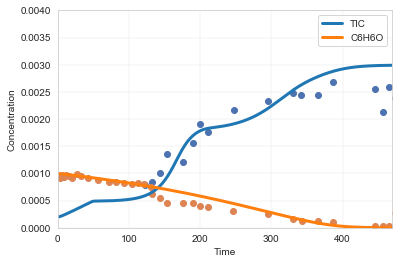

In [15]:
TIC = np.array([7.863, 8.411, 9.998, 13.579, 12.024, 15.631, 19.147, 17.681, 21.629, 23.262, 24.773, 24.387, 24.394, 26.843, 25.538, 21.211, 25.840, 23.891, 26.077, 28.489])
TIC_t = [122.147, 131.915, 144.467, 153.598, 176.683, 189.495, 199.395, 210.770, 247.330, 295.336, 330.495, 342.313, 365.250, 386.638, 444.955, 456.222, 465.128, 473.360, 479.726, 545.687]
C6 = np.array([9.169, 9.693, 9.259, 9.654, 9.480, 9.175, 9.874, 9.486, 9.143, 8.884, 8.412, 8.412, 8.328, 8.069, 8.243, 8.030, 7.415, 6.289, 5.467, 4.652, 4.477, 4.477, 4.089, 3.830, 3.053, 2.497, 1.630, 1.202, 1.293, 1.034, 0.342, 0.342, 0.342, 2.696, 2.052, 0.907, 0.476, 0.399])
C6_t = [3.286, 6.009, 9.465, 12.410, 15.389, 20.246, 26.868, 33.560, 43.091, 57.068, 72.554, 82.637, 93.192, 103.973, 113.058, 121.410, 131.636, 133.106, 143.961, 153.046, 175.449, 189.721, 199.287, 211.426, 246.847, 295.959, 330.171, 343.194, 365.081, 386.452, 445.421, 456.787, 465.838, 473.159, 480.518, 545.520, 551.482, 592.637]


ax = bl.plot(['TIC', 'C6H6O',], time_factor=1/24/60/60)
ax.scatter(TIC_t, TIC*1e-4,  c=sns.color_palette('deep', 10)[0])
ax.scatter(C6_t, C6*1e-4,  c=sns.color_palette('deep', 10)[1])
ax.set_xlim(0, 470)
ax.set_ylim(0, 4e-3)


(0, 0.001)

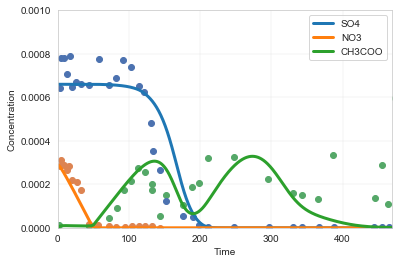

In [16]:
Ac_t = [1.975  , 43.952 , 53.565 , 72.077 , 82.769 , 93.567 , 103.181, 113.229, 122.162, 132.207, 132.672, 152.872, 175.652, 189.071, 198.469, 143.686, 211.170, 247.230, 330.862, 295.986, 365.090, 342.522, 386.724, 445.563, 464.544, 455.861, 473.120, 479.979, 545.557, 592.244 ]
Ac = np.array([0.151, 0.076, 0.076, 0.454, 0.904, 1.730, 2.148, 2.733, 2.567, 1.752, 2.025, 1.528, 1.062, 1.860, 2.056, 0.542, 3.228, 3.248, 1.584, 2.247, 1.315, 1.513, 3.331, 1.353, 1.115, 2.874, 5.951, 7.078, 8.467, 3.590])
SO4 = np.array([6.408, 7.057, 7.819, 7.819, 7.916, 6.495, 6.689, 6.606, 6.565, 7.765, 6.563, 6.894, 7.722, 7.402, 6.532, 6.243, 4.808, 3.513, 2.668, 1.246, 0.541, 0.485, 0.140, 0.0140, 0.0140, 0.0140, 0.0140, 0.0140, 0.0155, 0.0155, 0.0167, 0.0167, 0.0167])
SO4_t = [2.723, 13.089, 4.890, 8.790, 17.206, 20.093, 26.377, 32.916, 44.509, 57.545, 72.279, 81.922, 92.285, 103.192, 113.844, 121.571, 131.145, 134.215, 144.109, 152.343, 176.614, 189.505, 198.641, 211.750, 247.682, 296.403, 330.419, 343.459, 366.427, 387.480, 444.682, 455.121, 465.015]
NO3 = np.array([2.858, 3.135, 2.887, 2.679, 2.831, 2.183, 2.127, 1.753, 0.167, 0.114, 0.072, 0.043, 0.043, 0.085, 0.085, 0.085, 0.085, 0.0])
NO3_t = [2.708, 4.875, 9.209, 12.602, 16.250, 20.333, 26.902, 33.403, 43.515, 57.023, 72.009, 82.448, 94.109, 105.050, 114.476, 122.276, 132.459, 143.584]

ax = bl.plot(['SO4', 'NO3','CH3COO'], time_factor=1/24/60/60)
ax.scatter(Ac_t, Ac*1e-4, c=sns.color_palette('deep', 10)[2])
ax.scatter(SO4_t, SO4*1e-4,  c=sns.color_palette('deep', 10)[0])
ax.scatter(NO3_t, NO3*1e-4,  c=sns.color_palette('deep', 10)[1])
ax.set_xlim(0, 470)
ax.set_ylim(0, 1e-3)



/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(0, 470)

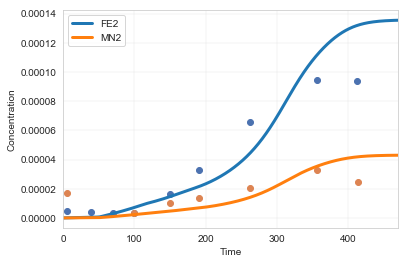

In [17]:
Fe2=np.array([0.478,0.393,0.347,0.363,1.611,3.251,6.585,9.475,9.393,9.138,10.207])
Fe2_t = [5.735, 38.461, 69.561, 99.869, 149.892, 190.223, 261.581, 356.076, 413.057, 477.192, 495.929]
Mn2 = np.array([1.740,0.369,1.018,1.376,2.073,3.302,2.434,3.054,2.878])
Mn2_t = [5.864, 100.037, 150.097, 190.314, 262.250, 356.388, 414.520, 476.941, 496.865]


ax = bl.plot(['FE2'], time_factor=1/24/60/60)
ax = bl.plot(['MN2'], time_factor=1/24/60/60)
ax.scatter(Fe2_t, Fe2*1e-5,  c=sns.color_palette('deep', 10)[0])
ax.scatter(Mn2_t, Mn2*1e-5,  c=sns.color_palette('deep', 10)[1])
ax.set_xlim(0, 470)
# ax.set_ylim(0, 1e-3)


In [18]:
bl.reconstruct_rates()

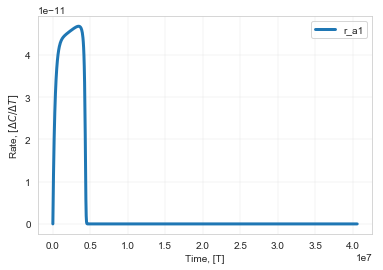

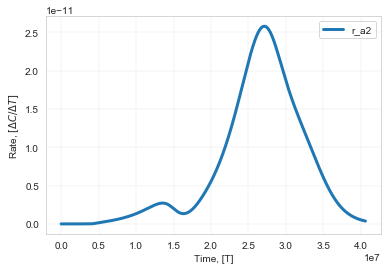

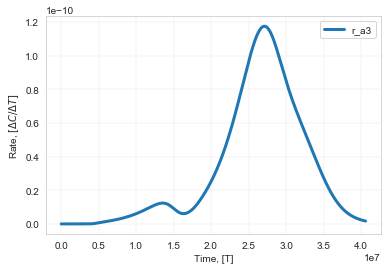

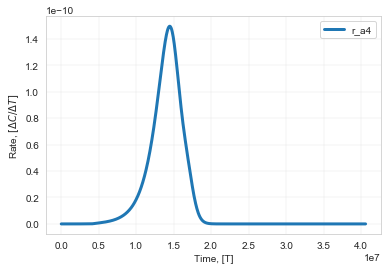

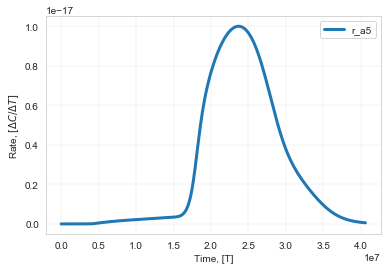

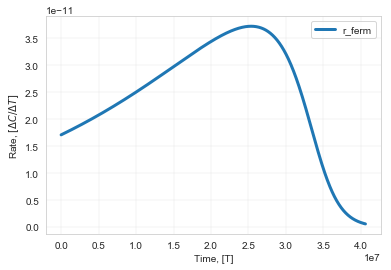

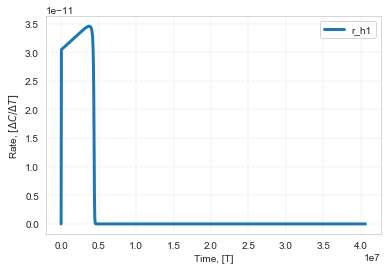

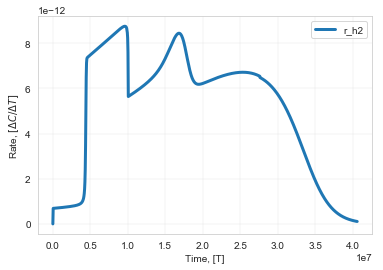

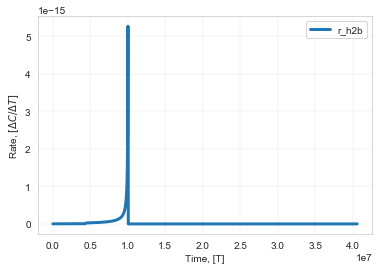

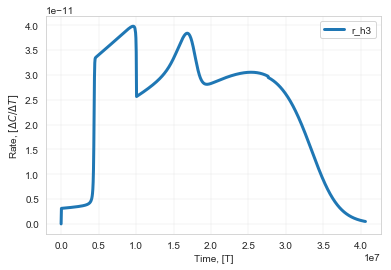

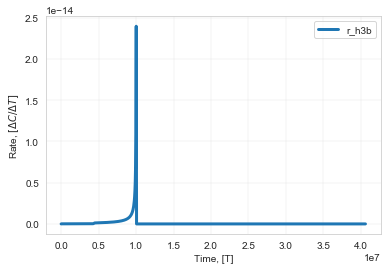

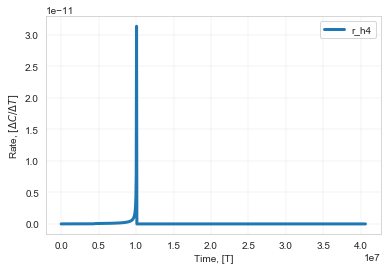

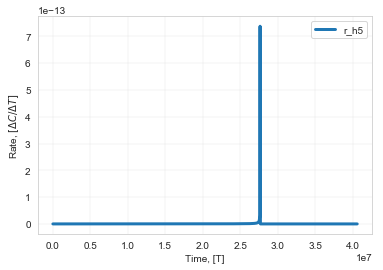

In [19]:
bl.plot_rates()

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


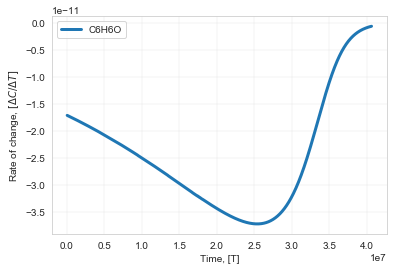

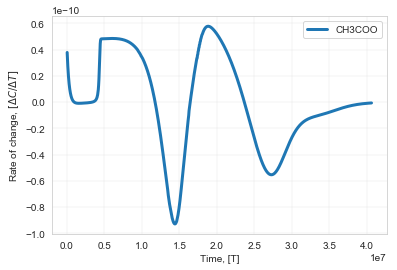

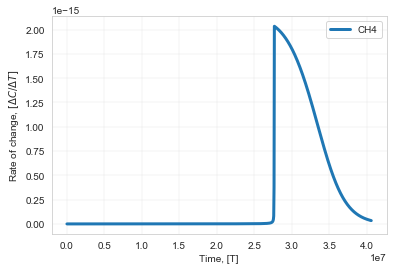

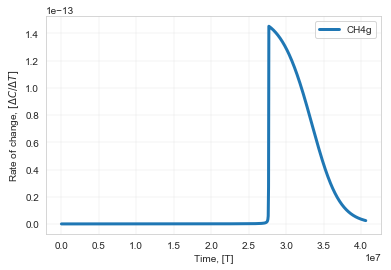

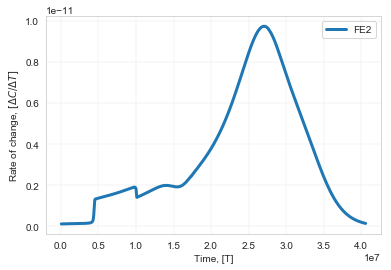

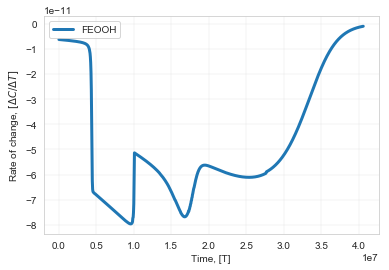

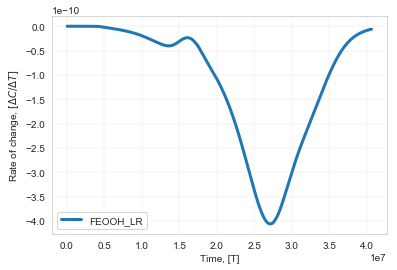

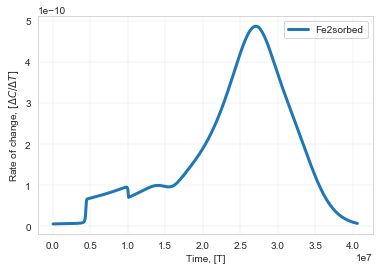

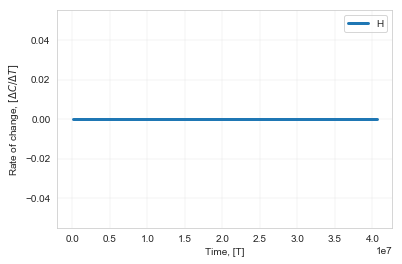

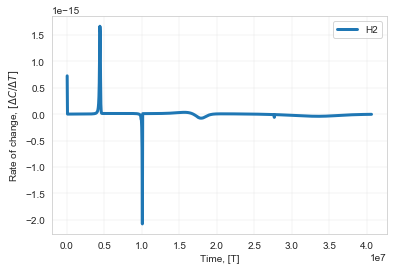

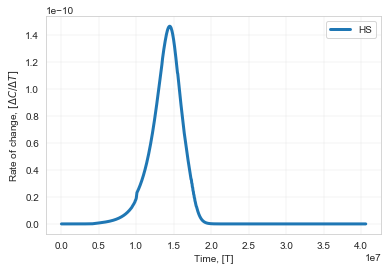

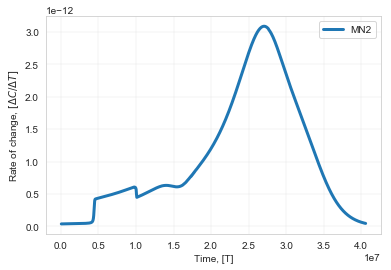

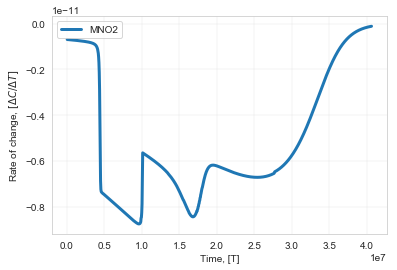

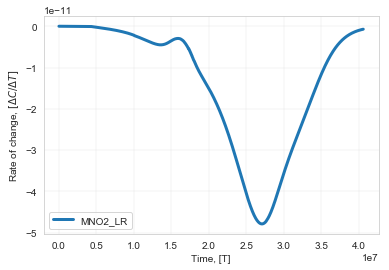

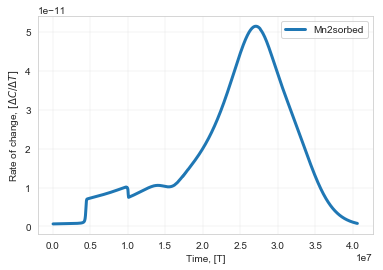

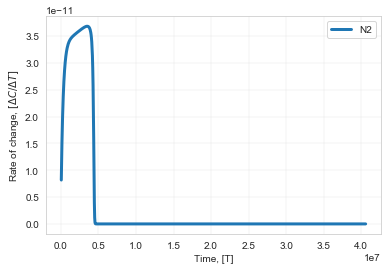

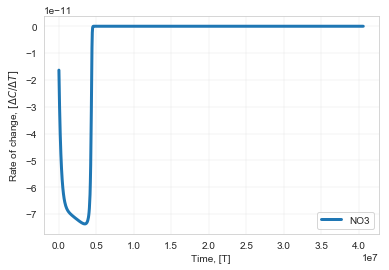

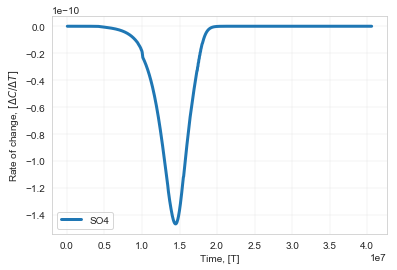

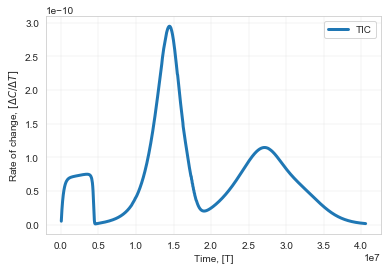

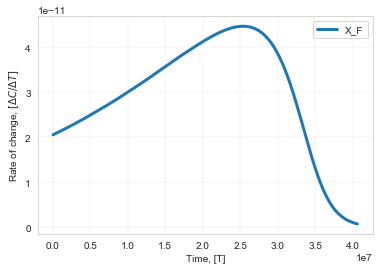

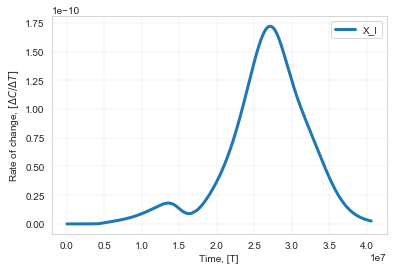

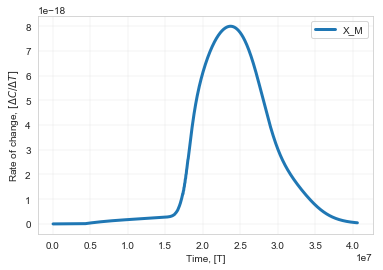

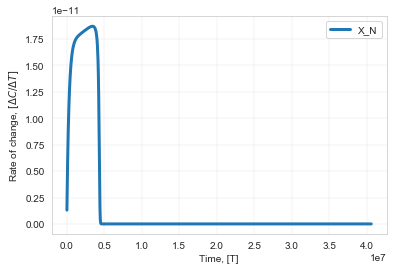

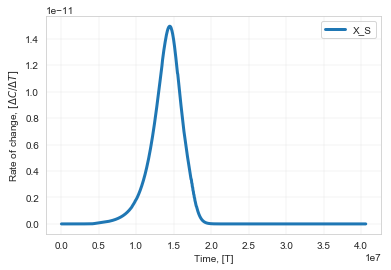

In [20]:
bl.plot_deltas()